In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_list=[]
values = []
key= 'Header'
with open('amazon-meta.txt', encoding="utf8") as fp:
    for line in fp:
        if "Id:" in line:
            master_list.append([key,values])
            key = line.rstrip('\n')[line.find(':')+1:]
            values =[]
        else:
            values.append(line.rstrip('\n'))
master_list.append([key,values])

In [3]:
df=pd.DataFrame(master_list[1:])

In [4]:
df.columns = ['Id','txt']

In [5]:
def split_parts(text):
    review_dict={}
    i=0
    while i<len(text):
        line=text[i]
        i=i+1
        if line.find('Id:')>=0:
            review_dict['Id']=line[line.find(':')+1:]
        if line.find('ASIN:')==0:
            review_dict['ASIN']=line[line.find(':')+1:]
        if line.find('group:')>=0:
            review_dict['group']=line[line.find(':')+1:]
        if line.find('salesrank:')>=0:
            review_dict['salesrank']=line[line.find(':')+1:]
        if line.find('title:')>=0:
            review_dict['title']=line[line.find(':')+1:]
        if line.find('categories:')>=0:
            all_cat=[]
            catExists=True
            while ((i<len(text)) & (catExists)):
                line=text[i]
                if line.find('reviews:')>0:
                    catExists=False
                else:
                    all_cat.append(line)
                i=i+1
            review_dict['categories']=all_cat
        if line.find('reviews:')>0:
            review_dict['total_reviews']=line[line.find('total:')+6:line.find('downloaded:')]
            review_dict['downloads']=line[line.find('ded:')+4:line.find('avg ra')]
            review_dict['avg_rating']=line[line.find('ting:')+5:]
            all_reviews=[]
            while i<len(text):
                line=text[i]
                all_reviews.append(line)
                i=i+1
            review_dict['reviews']=all_reviews
    return review_dict

In [6]:
df.iloc[2:7]['txt'].map(lambda x:split_parts(x)).apply(pd.Series)

,ASIN,avg_rating,categories,downloads,group,reviews,salesrank,title,total_reviews
2,0738700797,4.5,[ |Books[283155]|Subjects[1000]|Religion & S...,12,Book,[ 2001-12-16 cutomer: A11NCO6YTE4BTJ rati...,168596,Candlemas: Feast of Flames,12
3,0486287785,5,[ |Books[283155]|Subjects[1000]|Home & Garde...,1,Book,[ 2003-7-10 cutomer: A3IDGASRQAW8B2 ratin...,1270652,World War II Allied Fighter Planes Trading Cards,1
4,0842328327,4,[ |Books[283155]|Subjects[1000]|Religion & S...,1,Book,[ 2004-8-19 cutomer: A2591BUPXCS705 ratin...,631289,Life Application Bible Commentary: 1 and 2 Ti...,1
5,1577943082,0,[ |Books[283155]|Subjects[1000]|Religion & S...,0,Book,[],455160,Prayers That Avail Much for Business: Executive,0
6,0486220125,4,[ |Books[283155]|Subjects[1000]|Arts & Photo...,17,Book,[ 1997-7-4 cutomer: ATVPDKIKX0DER rating...,188784,How the Other Half Lives: Studies Among the T...,17


In [7]:
df_reviews=df['txt'].map(lambda x:split_parts(x)).apply(pd.Series)

In [8]:
df_reviews.head(3)

,ASIN,avg_rating,categories,downloads,group,reviews,salesrank,title,total_reviews
0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0827229534,5,[ |Books[283155]|Subjects[1000]|Religion & S...,2,Book,[ 2000-7-28 cutomer: A2JW67OY8U6HHK ratin...,396585,Patterns of Preaching: A Sermon Sampler,2
2,0738700797,4.5,[ |Books[283155]|Subjects[1000]|Religion & S...,12,Book,[ 2001-12-16 cutomer: A11NCO6YTE4BTJ rati...,168596,Candlemas: Feast of Flames,12


In [9]:
#reviews with Null rating are discontinued products
len(df_reviews[df_reviews.avg_rating.isnull()])

5872

In [10]:
df_reviews[df_reviews.avg_rating.isnull()].head(3)

,ASIN,avg_rating,categories,downloads,group,reviews,salesrank,title,total_reviews
0,0771044445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1892866315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,B00004TAU6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#exclude discont products
df_reviews=df_reviews[~df_reviews.avg_rating.isnull()]

In [12]:
len(df_reviews)

542684

In [13]:
df_reviews.group.unique()

array([' Book', ' Music', ' DVD', ' Video', ' Toy', ' Video Games',
       ' Software', ' Baby Product', ' CE', ' Sports'], dtype=object)

In [14]:
df_reviews[['group','avg_rating']].groupby('group').size()

group
 Baby Product         1
 Book            393561
 CE                   4
 DVD              19828
 Music           103144
 Software             5
 Sports               1
 Toy                  8
 Video            26131
 Video Games          1
dtype: int64

In [15]:
valid_group=[' Book', ' Music', ' DVD', ' Video']

In [16]:
#include only reviews for Books, Music, DVD and Video
df_reviews=df_reviews[df_reviews.group.isin(valid_group)]

In [17]:
df_reviews['avg_rating']=df_reviews['avg_rating'].str.strip().astype(float)

In [18]:
df_reviews['salesrank'].isnull().sum()

0

In [19]:
df_reviews['salesrank']=df_reviews['salesrank'].astype(int)

In [20]:
df_reviews['total_reviews'].isnull().sum()

0

In [21]:
df_reviews['total_reviews']=df_reviews['total_reviews'].astype(int)

In [22]:
df_reviews[['group','avg_rating']].groupby('group')['avg_rating'].mean()

group
 Book     3.051148
 DVD      3.670996
 Music    3.635529
 Video    3.563105
Name: avg_rating, dtype: float64

In [23]:
df_reviews[df_reviews.group.str.strip()=='Book'].describe()

,avg_rating,salesrank,total_reviews
count,393561.000000,3.935610e+05,393561.000000
mean,3.051148,6.309069e+05,11.961508
std,2.064086,6.044099e+05,72.982704
min,0.000000,-1.000000e+00,0.000000
25%,0.000000,2.034870e+05,0.000000
50%,4.000000,4.672210e+05,2.000000
75%,5.000000,8.545130e+05,6.000000
max,5.000000,3.798351e+06,5545.000000


In [24]:
#salesrank < 1 - probable error in the data
len(df_reviews[df_reviews.salesrank<0])

459

In [25]:
#remove the rows with salesrank <-1
df_reviews = df_reviews[~(df_reviews.salesrank<0)]

In [26]:
len(df_reviews)

542205

In [27]:
#let us look at the data for books
df_reviews[df_reviews.group.str.strip()=='Book'].describe()

,avg_rating,salesrank,total_reviews
count,393188.000000,3.931880e+05,393188.000000
mean,3.053833,6.315054e+05,11.972535
std,2.063006,6.043839e+05,73.016366
min,0.000000,0.000000e+00,0.000000
25%,0.000000,2.041775e+05,0.000000
50%,4.000000,4.677850e+05,2.000000
75%,5.000000,8.550255e+05,6.000000
max,5.000000,3.798351e+06,5545.000000


In [28]:
#let us look at the data for Music
df_reviews[df_reviews.group==' Music'].describe()

,avg_rating,salesrank,total_reviews
count,103062.000000,103062.000000,103062.000000
mean,3.637912,154425.635821,13.695688
std,1.839896,135983.853605,55.135060
min,0.000000,0.000000,0.000000
25%,3.500000,48816.500000,1.000000
50%,4.500000,116133.500000,3.000000
75%,5.000000,223707.750000,9.000000
max,5.000000,671027.000000,3839.000000


In [29]:
df_reviews[(df_reviews.salesrank>0) & (df_reviews.salesrank<11)]

,ASIN,avg_rating,categories,downloads,group,reviews,salesrank,title,total_reviews
28339,6301627024,5.0,[ |[139452]|VHS[404272]|Actors & Actresses[1...,64,Video,[ 1999-1-16 cutomer: AFOOFG7PGFAP3 ratin...,2,Shirley Valentine,64
113500,B00005T33H,4.5,[ |[139452]|VHS[404272]|Actors & Actresses[1...,102,Video,[ 2002-1-22 cutomer: AIK3FLGJGDPN6 ratin...,6,Leslie Sansone - Walk Away the Pounds - Super...,102
297446,6300215539,4.0,[ |[139452]|VHS[404272]|Actors & Actresses[1...,125,Video,[ 1998-12-29 cutomer: A3SHWOHGEAOQZE rati...,1,The War of the Worlds,126
334786,6302946387,4.5,[ |[139452]|VHS[404272]|Actors & Actresses[1...,136,Video,[ 1998-12-12 cutomer: ATVPDKIKX0DER rati...,7,Robin Hood - Men in Tights,136
486687,6301729897,4.0,[ |[139452]|VHS[404272]|Genres[404274]|Fitne...,40,Video,[ 1998-11-2 cutomer: ATVPDKIKX0DER ratin...,8,Richard Simmons - Sweatin' to the Oldies,40


In [30]:
book_review_df=df_reviews[df_reviews.group==' Book']

In [31]:
len(book_review_df)

393188

In [32]:
music_review_df=df_reviews[df_reviews.group==' Music']

In [33]:
len(music_review_df)

103062

In [34]:
dvd_review_df=df_reviews[df_reviews.group==' DVD']

In [35]:
len(dvd_review_df)

19826

In [36]:
video_review_df=df_reviews[df_reviews.group==' Video']

In [37]:
len(video_review_df)

26129

### Trustworthiness of ratings
_Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively speaking) about the ratings in this dataset?_

From the given data, we can say that the rating of a product is not trustworthy if there are unusually high number of positive reviews that do not correspond to a high salesrank.



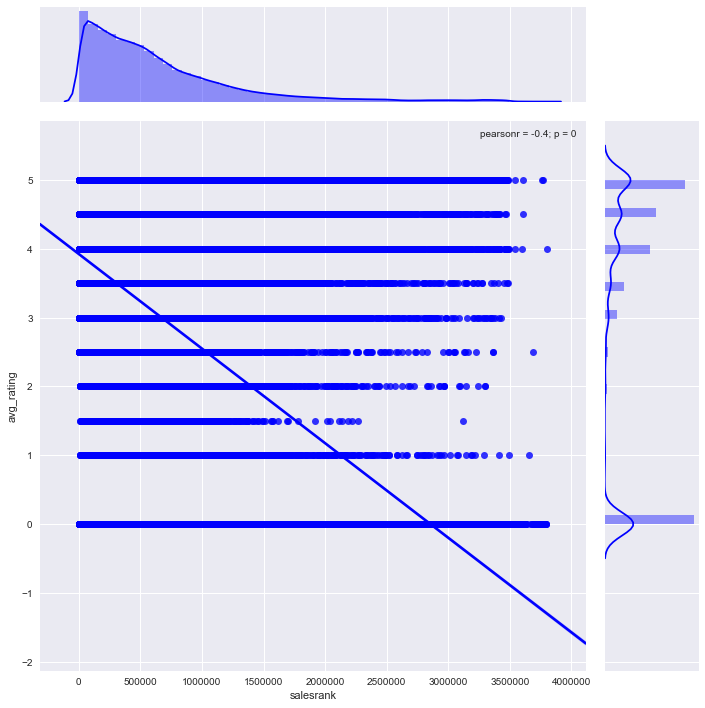

In [38]:
sns.jointplot(book_review_df['salesrank'], book_review_df['avg_rating'],  kind="reg", color="b", size=10)
#plt.savefig('actor1_corr.jpg')
plt.show()

From the above we see that there is a strong correlation between the salesrank and the average rating. From this, we can reasonably say that if an item ranks very low in the salesrank (i.e. has a high absolute value or sells very less compared to other items) but has an unusually high rating, it could be something to investigate

In [39]:
# from the above cells, we know that the 75th percentile is 8.550255e+05
# let us see how many books that have a sales rank above this but have an avg rating of 4 or greater
# and has at least more than 10 reviews - this to account for books that have very unique readers
book_review_df[(book_review_df['salesrank']>855025)&(book_review_df['avg_rating']>=4)&(book_review_df['total_reviews']>10)][['title','salesrank','total_reviews','avg_rating']]

,title,salesrank,total_reviews,avg_rating
198,Imitation of Christ,933676,39,4.5
329,James Joyce (Penguin Lives (Audio)),1204592,14,4.5
481,A Major Case: A Novel by Pete Deer,2860756,14,4.5
935,Frederick,1035931,19,4.5
1819,Light House,861412,21,4.0
1956,Final Blackout,1337368,16,4.0
2009,Laughter in the Dark (New Directions Paperbook),1061681,25,4.5
2014,When I Was Little: A Four Year Old's Memoir o...,1072575,15,4.5
2384,If I Could,928240,43,4.0
2685,Animal Farm,1007371,992,4.5


***
### Category bloat
_Consider the product group named 'Books'. Each product in this group is associated with categories. Naturally, with categorization, there are tradeoffs between how broad or specific the categories must be._

_For this dataset, quantify the following:_
1. Is there redundancy in the categorization? How can it be identified/removed?
2. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?

***
Let us look at the categories

In [40]:
book_review_df['categories'].iloc[0]

['   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
 '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]']

In [41]:
book_review_df['categories'].iloc[10]

['   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Cooking by Ingredient[4208]|Herbs, Spices & Condiments[4211]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|General[4233]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Special Diet[4317]|Diabetic & Sugar-Free[4318]',
 '   |Books[283155]|Subjects[1000]|Cooking, Food & Wine[6]|Special Diet[4317]|Low Fat[4323]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Nutrition[282861]|General[4628]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low Carbohydrate[4639]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low Sugar[4642]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Special Conditions[4632]|Low-Fat Diet[282849]',
 '   |Books[283155]|Subjects[1000]|Health, Mind & Body[10]|Diets & Weight Loss[4613]|Diets[4615]|Low Carb[109246

In [42]:
book_review_df['categories'].iloc[100]

["   |Books[283155]|Subjects[1000]|Children's Books[4]|Literature[2966]|Action & Adventure[2967]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Science, Nature & How It Works[3207]|Fiction[3228]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Series[3302]|Early Reader[3315]|Magic School Bus[3324]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Ages 4-8[2785]|Picture Books[170061]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Authors & Illustrators, A-Z[170540]|( C )[170543]|Cole, Joanna[170637]",
 "   |Books[283155]|Subjects[1000]|Children's Books[4]|Authors & Illustrators, A-Z[170540]|( D )[170544]|Degen, Bruce[170651]",
 '   |Books[283155]|Formats[504358]|Libros en español[301731]|Infantil y juvenil[301735]|No ficción[301737]',
 '   |Books[283155]|Formats[504358]|Libros en español[301731]|Infantil y juvenil[301735]|4 a 8 años[301739]']

From the above, we see that there are multiple categories that are repeated in the same pattern. To find out if we can reduce the redundancy, find out the distribution of the sub-categories within the category list. There may be some subcategories that figure in only a few books. By finding if there are such categories, we can reduce category bloat 

In [81]:
all_cat_list=[]
tot_cat_list=0
for item in book_review_df['categories']:
    for cat_list in item:
        tot_cat_list=tot_cat_list+1
        for c in (cat_list[4:].strip().split('|')):
            all_cat_list.append(c)

In [82]:
len(all_cat_list)

7888715

In [83]:
tot_cat_list

1439885

In [84]:
len(book_review_df)

393188

There are a total of 393188 books reviewed; 1,439,885 grouping of categories across these books 

In [86]:
len(set(all_cat_list))

14922

14,922 unique categories used

In [96]:
cat_df=pd.DataFrame(all_cat_list)

In [97]:
cat_df.columns=['Category']

In [110]:
cat_counts_df=pd.DataFrame(cat_df.groupby('Category').size().sort_values()).reset_index()

In [112]:
cat_counts_df.columns=['Category','Count']

In [113]:
cat_counts_df.Count.sum()

7888715

In [116]:
cat_counts_df[cat_counts_df.Count<=1]

,Category,Count
0,"von Konigslow, Andrea Wayne[1044084]",1
1,Renaissance (c.1450-1600)[490124],1
2,Eastern European[4278],1
3,Audio CD[287468],1
4,Suites[36675],1
5,"Leonard, Paul[15540]",1
6,Musicals & Performing Arts[508526],1
7,"Atwood, Margaret[1064970]",1
8,"Hassam, Childe[67955]",1
9,Muslim[1804],1


We see that there are 1104 out of 14,922 occur only once in the categorization. Hence by looking at this distribution it is possible to reduce the number of categorizations without reducing the overall specificity.

***

### Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?

By using clustering algorithms, we can create clusters of items that the customers bought together. This would give a different view of product categorization. However, the usefulness of such categorization should be evaluated. For example, while this approach may help someone who would like to buy a diaper bag and diapers, it may not help someone who is trying to compare different brands of diapers. 


### 2. Product thinking
Now, put on your 'product thinking' hat.
a. Is it a good idea to show users the categorization hierarchy for items?
b. Is it a good idea to show users similar/co-purchased items?
c. Is it a good idea to show users reviews and ratings for items?
d. For each of the above, why? How will you establish the same?

a. Is it a good idea to show users the categorization hierarchy for items?

It depends on the item and the level of search the customer is looking for. For example, someone who is going to buy any phone as long as it is cheap would not be helped by a hierarchial categorization. Heirarchial categorization is useful when someone is looking for a specific product and its closest alternatives.

b. Is it a good idea to show users similar/co-purchased items?

It usually is. There are certain types of items that people typically purchase together and showing them together acts as a reminder that the customer needs to get the other item as well. Common example, phones and memory cards

c. Is it a good idea to show users reviews and ratings for items?

In most cases, yes it is. However, there may be certain drawbacks of this approach. Using the ratings allows one to manipulate the perception of the product quality. Also, showing reviews / ratings means that badly rated products / non-rated products would not get as much as air-time as other products. They may not be sold as much as it should have been.